
# CNN Image Classification
## Cameron Swanson, Jessica Mao
## 4/23/21


__Dataset:__ Intel Image Classification.  Originally 25,000 images with multiple classes -- 3,000 images picked from two classes ('forest' and 'street') for the purposes of this problem.

__Link:__ https://www.kaggle.com/puneet6060/intel-image-classification

To begin, we'll import all our necessary libraries for both problems.

In [148]:
import keras
from keras import models
from keras import layers
from keras import optimizers
import PIL
from PIL import Image, ImageOps
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler

### Loading Images -- 2400 training, 600 test, 50/50 class split

Our first step is to __load our training and test images__, convert them to __grayscale__, and arrange them in __Numpy arrays__ of pixel values.  We'll also assign __numeric labels__ to each class -- class 0 represents 'forest' images, and class 1 represents 'street' images.  We'll print out the __shape__ of each array to confirm successful execution.

In [130]:
# Training images - forest

filepath = "Intel\\train_forest"

imgs = []

for file in glob.glob(filepath + "\\*.jpg"):
    img = Image.open(file)
    img = img.resize((150,150))
    img = ImageOps.grayscale(img)
    img_arr = np.array(img)
    img_arr.reshape((150,150,1))
    imgs.append(img_arr)
X_train_forest = np.stack(imgs)
y_train_forest = np.repeat(0,X_train_forest.shape[0])
print(X_train_forest.shape, y_train_forest.shape)

(1200, 150, 150) (1200,)


In [131]:
# Training images - street

filepath = "Intel\\train_street"

imgs = []

for file in glob.glob(filepath + "\\*.jpg"):
    img = Image.open(file)
    img = img.resize((150,150))
    img = ImageOps.grayscale(img)
    img_arr = np.array(img)
    img_arr.reshape((150,150,1))
    imgs.append(img_arr)
X_train_street = np.stack(imgs)
y_train_street = np.repeat(1,X_train_street.shape[0])
print(X_train_street.shape, y_train_street.shape)

(1200, 150, 150) (1200,)


In [132]:
# Test images - forest

filepath = "Intel\\test_forest"

imgs = []

for file in glob.glob(filepath + "\\*.jpg"):
    img = Image.open(file)
    img = img.resize((150,150))
    img = ImageOps.grayscale(img)
    img_arr = np.array(img)
    img_arr.reshape((150,150,1))
    imgs.append(img_arr)
X_test_forest = np.stack(imgs)
y_test_forest = np.repeat(0,X_test_forest.shape[0])
print(X_test_forest.shape, y_test_forest.shape)

(300, 150, 150) (300,)


In [133]:
# Test images - street

filepath = "Intel\\test_street"

imgs = []

for file in glob.glob(filepath + "\\*.jpg"):
    img = Image.open(file)
    img = img.resize((150,150))
    img = ImageOps.grayscale(img)
    img_arr = np.array(img)
    img_arr.reshape((150,150,1))
    imgs.append(img_arr)
X_test_street = np.stack(imgs)
y_test_street = np.repeat(1,X_test_street.shape[0])
print(X_test_street.shape, y_test_street.shape)

(300, 150, 150) (300,)


### Preprocessing

Our next step is to __combine our arrays for each class__, such that we have one training set and one test set.

In [134]:
X_train = np.concatenate([X_train_forest, X_train_street])
X_test = np.concatenate([X_test_forest, X_test_street])
print(X_train.shape, X_test.shape)

(2400, 150, 150) (600, 150, 150)


In [135]:
y_train = np.concatenate([y_train_forest, y_train_street])
y_test = np.concatenate([y_test_forest, y_test_street])
print(y_train.shape, y_test.shape)

(2400,) (600,)


Now, we'll shuffle our image array before inputting them into the network.

In [136]:
X_train, y_train = shuffle(X_train, y_train, random_state = 123)

Next, we __normalize our pixel values__ such that they fall between 0 and 1 -- this is to assist with training the neural network.

In [137]:
X_train = X_train.astype('float32')
X_train /= 255
X_train = X_train.reshape(2400,150,150,1)


X_test = X_test.astype('float32')
X_test /= 255
X_test = X_test.reshape(600,150,150,1)
print(X_train.shape, X_test.shape)

(2400, 150, 150, 1) (600, 150, 150, 1)


Finally, we __dummify our class labels__ before inputting them into the network.

In [138]:
y_train = keras.utils.to_categorical(y_train, 2)
y_test = keras.utils.to_categorical(y_test, 2)
print(y_train.shape, y_test.shape)

(2400, 2) (600, 2)


### Building the Network

We'll build our network with __two Conv2D layers__ and __two pooling layers__.  We'll train it for __20 epochs__ with a validation split of 1/6.

In [139]:
model = models.Sequential()
model.add(layers.Conv2D(filters = 32,
                       kernel_size = (3,3),
                       activation = 'relu',
                       input_shape = (150,150,1)))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Conv2D(filters = 64,
                       kernel_size = (3,3),
                       activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units = 64, activation = 'relu'))
model.add(layers.Dense(units = 2, activation = 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
network = model.fit(X_train, y_train, epochs = 20, batch_size = 64, validation_split = 1/6, verbose = 1)

Epoch 1/20
32/32 [==============================] - 55s 2s/step - loss: 1.4588 - accuracy: 0.5571 - val_loss: 0.6060 - val_accuracy: 0.6000
Epoch 2/20
32/32 [==============================] - 47s 1s/step - loss: 0.4782 - accuracy: 0.7605 - val_loss: 0.3015 - val_accuracy: 0.8975
Epoch 3/20
32/32 [==============================] - 47s 1s/step - loss: 0.4120 - accuracy: 0.8618 - val_loss: 0.3090 - val_accuracy: 0.8500
Epoch 4/20
32/32 [==============================] - 46s 1s/step - loss: 0.4003 - accuracy: 0.8601 - val_loss: 0.2248 - val_accuracy: 0.9075
Epoch 5/20
32/32 [==============================] - 46s 1s/step - loss: 0.2763 - accuracy: 0.8855 - val_loss: 0.2436 - val_accuracy: 0.9075
Epoch 6/20
32/32 [==============================] - 45s 1s/step - loss: 0.2473 - accuracy: 0.8962 - val_loss: 0.6501 - val_accuracy: 0.7225
Epoch 7/20
32/32 [==============================] - 46s 1s/step - loss: 0.2387 - accuracy: 0.9128 - val_loss: 0.1670 - val_accuracy: 0.9425
Epoch 8/20
32/32 [==

### 1.  Plot the loss and accuracy curves for training and validation sets.

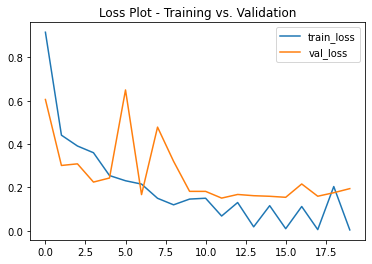

In [140]:
plt.plot(network.history['loss'], label='train_loss')
plt.plot(network.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss Plot - Training vs. Validation')
plt.show()

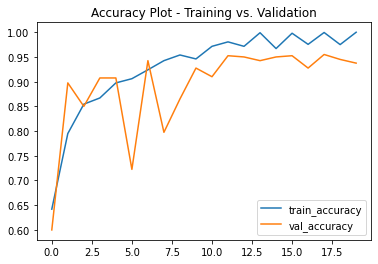

In [141]:
plt.plot(network.history['accuracy'], label='train_accuracy')
plt.plot(network.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy Plot - Training vs. Validation')
plt.show()

### 2.  Explain if you observe any overfitting and why.

Looking at the accuracy plot, it looks like there is __no overfitting__ -- as the __training accuracy__ continues to increase, the __validation accuracy does not increase__ (although it starts to converge as we pass about 10 epochs).  If the validation accuracy were to start increasing over epochs, then we would have overfitting, since it would indicate the network is not generalizing well to new data.

### 3.  Report the model accuracy on the test set.  Include the confusion matrix.

In [142]:
score = model.evaluate(X_test, y_test)
print('\nModel', model.metrics_names[1],'on test set is', score[1])

19/19 [==============================] - 4s 206ms/step - loss: 0.2703 - accuracy: 0.9317

Model accuracy on test set is 0.9316666722297668


In [143]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)

y_test_class = []
for row in y_test:
    class_label = np.argmax(row)
    y_test_class.append(class_label)
y_test_class = np.asarray(y_test_class)

conf_mat = pd.DataFrame(confusion_matrix(y_test_class, y_pred))
conf_mat.columns = ['\'Forest\' Predicted', '\'Street\' Predicted']
conf_mat.index = ['\'Forest\' Actual', '\'Street\' Actual']
conf_mat

,'Forest' Predicted,'Street' Predicted
'Forest' Actual,285,15
'Street' Actual,26,274
